a = 10
adsfasdf
a
dsf
ads

fa

sdf
asdfasdfasdfa
dfsdf

In [2]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
plt.rcParams['figure.figsize'] = [10, 10]
np.set_printoptions(precision = 4,suppress=True)

def my_function():
    print "helo alex"

#multiple view geometry page 279 Computation of the F

In [3]:
img1 = cv2.imread('../1.jpg')
img2 = cv2.imread('../2.jpg')

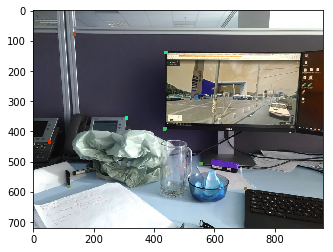

In [4]:
points1 = np.array([[309,356],[440,139],[436,392],[556,506],[118,582],[703,590],[137,79],[54,435]])
points2 = np.array([[299,328],[374,136],[382,360],[476,468],[91,497],[496,545],[173,100],[113,386]])

#reverse order of points to comply with Perception course assignement style
aux =  points1
points1 = points2
points2 = aux

#points1 = x
#points2 = x'

for i in range(len(points1)):
    cv2.circle(img2, (points1[i][0], points1[i][1]), radius =1, color=(i * 30,255-i*30,140-i*20),thickness= 10)
    cv2.circle(img1, (points2[i][0], points2[i][1]), radius =1, color=(i * 30,255-i*30,140-i*20),thickness= 10)
plt.imshow(img1)

#points1_centered = points1 - points1.mean(axis=1, keepdims=True)
#points2_centered = points2 - points2.mean(axis=1, keepdims=True)
#points1 = points1_centered
#points2 = points2_centered

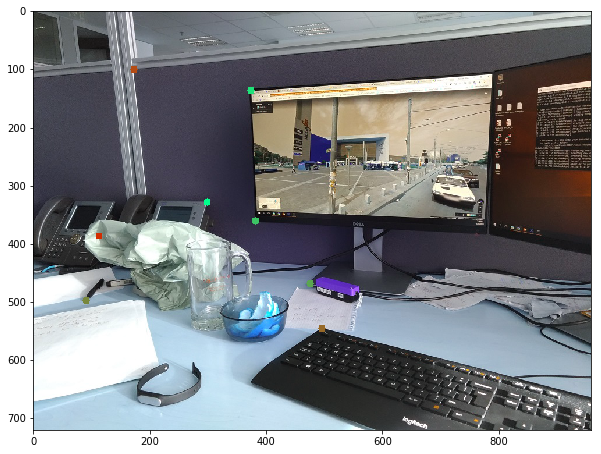

In [48]:
plt.imshow(img2)

In [6]:
def createA_matrix(points2, points1):
    A = np.ones((8,9), dtype=np.float32)
    for i in range(len(points1)):
        A[i][0]=points2[i][0] * points1[i][0] #x' * x
        A[i][1]=points2[i][0] * points1[i][1] #x' * y
        A[i][2]=points2[i][0]                 #x'
        A[i][3]=points2[i][1] * points1[i][0] #y' * x
        A[i][4]=points2[i][1] * points1[i][1] #y' * y
        A[i][5]=points2[i][1]                 #y'
        A[i][6]=points1[i][0]                 #x
        A[i][7]=points2[i][1]                 #y
        A[i][8]=1    
    return A
A = createA_matrix(points2, points1)
print (A)

[[ 92391. 101352.    309. 106444. 116768.    356.    299.    356.      1.]
 [164560.  59840.    440.  51986.  18904.    139.    374.    139.      1.]
 [166552. 156960.    436. 149744. 141120.    392.    382.    392.      1.]
 [264656. 260208.    556. 240856. 236808.    506.    476.    506.      1.]
 [ 10738.  58646.    118.  52962. 289254.    582.     91.    582.      1.]
 [348688. 383135.    703. 292640. 321550.    590.    496.    590.      1.]
 [ 23701.  13700.    137.  13667.   7900.     79.    173.     79.      1.]
 [  6102.  20844.     54.  49155. 167910.    435.    113.    435.      1.]]


In [72]:
full_matrices = True
u, s, vh = np.linalg.svd(A, full_matrices=full_matrices)
#if full_matrices=False then we miss a column in comparison with Coursera assigmement
#in this links are explained the differences
#https://gist.github.com/addisonhuddy/8a9e682259c9dca1f61672b4027863dc
#http://blog.explainmydata.com/2016/01/how-much-faster-is-truncated-svd.html
#if i would use SVD for noise removal or corelation removal then the faster version (full_matrices=False) would be the apropiate choice such as in PCA
#if i would use SVD for computing F then i need the small singular vectors (which in the above version are ignored)

print (vh.shape)
print (vh)
print (vh.transpose())

(9, 9)
[[-0.5032 -0.5208 -0.0011 -0.4444 -0.5273 -0.0011 -0.0009 -0.0011 -0.    ]
 [-0.5146 -0.2262 -0.0009 -0.1228  0.8179  0.0017 -0.0006  0.0017  0.    ]
 [ 0.6906 -0.605   0.0031 -0.3311  0.2174  0.0021  0.0032  0.0021  0.    ]
 [-0.0706 -0.5582  0.0017  0.8233 -0.0752  0.0039  0.0041  0.0039  0.    ]
 [ 0.004  -0.0059 -0.5498  0.0045  0.0022 -0.3967 -0.6187 -0.3967 -0.0036]
 [-0.0012 -0.0014  0.3335  0.0017  0.0022 -0.5845  0.4533 -0.5845  0.0014]
 [-0.0006 -0.0009  0.7658  0.0012  0.     -0.0303 -0.6415 -0.0303 -0.0135]
 [ 0.      0.     -0.0079 -0.     -0.      0.001   0.0115  0.001  -0.9999]
 [-0.     -0.      0.      0.      0.      0.7071 -0.     -0.7071  0.    ]]
[[-0.5032 -0.5146  0.6906 -0.0706  0.004  -0.0012 -0.0006  0.     -0.    ]
 [-0.5208 -0.2262 -0.605  -0.5582 -0.0059 -0.0014 -0.0009  0.     -0.    ]
 [-0.0011 -0.0009  0.0031  0.0017 -0.5498  0.3335  0.7658 -0.0079  0.    ]
 [-0.4444 -0.1228 -0.3311  0.8233  0.0045  0.0017  0.0012 -0.      0.    ]
 [-0.5273  0.8179

In [77]:
print (A)

[[ 92391. 101352.    309. 106444. 116768.    356.    299.    356.      1.]
 [164560.  59840.    440.  51986.  18904.    139.    374.    139.      1.]
 [166552. 156960.    436. 149744. 141120.    392.    382.    392.      1.]
 [264656. 260208.    556. 240856. 236808.    506.    476.    506.      1.]
 [ 10738.  58646.    118.  52962. 289254.    582.     91.    582.      1.]
 [348688. 383135.    703. 292640. 321550.    590.    496.    590.      1.]
 [ 23701.  13700.    137.  13667.   7900.     79.    173.     79.      1.]
 [  6102.  20844.     54.  49155. 167910.    435.    113.    435.      1.]]


In [90]:
print (u.shape)
#https://docs.scipy.org/doc/numpy-1.14.0/reference/generated/numpy.linalg.svd.html
print (np.diag(s).shape)
print (vh.shape)
if full_matrices == False:
    Arecon = np.dot(np.dot(u,np.diag(s)), vh)
else:
    vh_mult = vh[:, :s.shape[0]]       # in the example from documentation they did this operation for U, but here i did for Vh because my matrix is 8x9 while in example it is 9x6
    vh_mult = vh_mult * s
    result = np.dot(vh_mult, u)
    np.allclose(A, result.transpose())
    #Arecon = np.dot(u[:, :s.shape[0]] * s, vh)
    #or
    #smat = np.zeros((u.shape[0], s.shape[0]), dtype=complex)
    #smat[:s.shape[0], :s.shape[0]] = np.diag(s)
    #np.allclose(A, np.dot(u, np.dot(smat, vh)))
    #Arecon = np.dot(u, np.dot(smat, vh))
print (Arecon)

(8, 8)
(8, 8)
(9, 9)
[[ 92391.     101352.01      309.     106444.     116768.01      356.
     299.        356.          1.    ]
 [164559.98    59839.996     440.      51986.      18904.        139.
     374.        139.          1.    ]
 [166552.     156960.        436.     149744.     141119.98      392.
     382.        392.          1.    ]
 [264656.03   260208.        556.     240856.02   236808.02      506.
     476.        506.          1.    ]
 [ 10738.006   58646.004     118.      52962.004  289254.        582.
      91.        582.          1.    ]
 [348688.     383135.        702.9999 292640.03   321550.        589.9999
     496.0001    589.9999      1.    ]
 [ 23701.      13700.001     137.      13667.       7900.0015     79.
     173.         79.          1.    ]
 [  6102.0054  20844.004      54.      49155.008  167910.        435.
     113.        435.          1.    ]]


In [91]:
v = vh.transpose()
print (v)

[[-0.5032 -0.5146  0.6906 -0.0706  0.004  -0.0012 -0.0006  0.     -0.    ]
 [-0.5208 -0.2262 -0.605  -0.5582 -0.0059 -0.0014 -0.0009  0.     -0.    ]
 [-0.0011 -0.0009  0.0031  0.0017 -0.5498  0.3335  0.7658 -0.0079  0.    ]
 [-0.4444 -0.1228 -0.3311  0.8233  0.0045  0.0017  0.0012 -0.      0.    ]
 [-0.5273  0.8179  0.2174 -0.0752  0.0022  0.0022  0.     -0.      0.    ]
 [-0.0011  0.0017  0.0021  0.0039 -0.3967 -0.5845 -0.0303  0.001   0.7071]
 [-0.0009 -0.0006  0.0032  0.0041 -0.6187  0.4533 -0.6415  0.0115 -0.    ]
 [-0.0011  0.0017  0.0021  0.0039 -0.3967 -0.5845 -0.0303  0.001  -0.7071]
 [-0.      0.      0.      0.     -0.0036  0.0014 -0.0135 -0.9999  0.    ]]


In [92]:
last_col_of_v = v[:,-1]

In [93]:
F = last_col_of_v.reshape((3,3))

In [94]:
print (F)

[[-0.     -0.      0.    ]
 [ 0.      0.      0.7071]
 [-0.     -0.7071  0.    ]]


In [95]:
u_, s_, vh_ = np.linalg.svd(F)

In [96]:
s_last_zero = s_
s_last_zero[2] = 0
F_prime = np.dot( np.dot(u_, np.diag(s_last_zero)),vh_)
print  (np.linalg.norm(F_prime))
F_prime = np.divide(F_prime, np.linalg.norm(F_prime))

1.0


In [97]:

print (F_prime)


[[ 0.      0.      0.    ]
 [ 0.      0.      0.7071]
 [-0.     -0.7071  0.    ]]


In [98]:
#left null space (epipole e)
A = F_prime
rank = np.linalg.matrix_rank(A)
U, s, V = np.linalg.svd(A, full_matrices = True)
t_U_A = np.transpose(U)
nrow = t_U_A.shape[0]
left_null_A = t_U_A[rank:nrow,:]
left_null_A

print (left_null_A.shape)
np.dot((left_null_A[0,:] + left_null_A[0,:]), A)

(1, 3)


array([-0., -0.,  0.], dtype=float32)

In [99]:
#Right null space (epipole e')
A = F_prime
B = np.transpose(A)
rank = np.linalg.matrix_rank(B)
U, s, V = np.linalg.svd(B, full_matrices = True)
t_V_B = np.transpose(V)
ncols = t_V_B.shape[1]
right_null_B = t_V_B[:,rank:ncols]
right_null_B

print (right_null_B.shape)
np.dot(B, (right_null_B[:,0] + right_null_B[:,0]))

(3, 1)


array([0., 0., 0.], dtype=float32)

In [100]:
np.set_printoptions(precision = 16)

#left null space
left_null_A


array([[-1.                ,  0.0000000000000027,  0.                ]],
      dtype=float32)

In [101]:
#Right null space
right_null_B.transpose()

array([[ 1.                , -0.0000000000000026,  0.0000000000000002]],
      dtype=float32)